In [1]:
# implementation of Agglomerative clustering and K-Means clustering algorithm on test dataset
# an artificial data set consisting of 3000 observations on 2 numeric variables (named V1 and V2) giving the x and y coordinates of the points 

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

In [4]:
measured_data = pd.read_csv("xclara.csv",  delimiter=",") 
measured_data.head()

,Unnamed: 0,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


In [3]:
measured_data.dtypes

Unnamed: 0      int64
V1            float64
V2            float64
dtype: object

In [6]:
measured_data = measured_data.loc[:,["V1","V2"]].dropna()

In [8]:
measured_data = measured_data.values

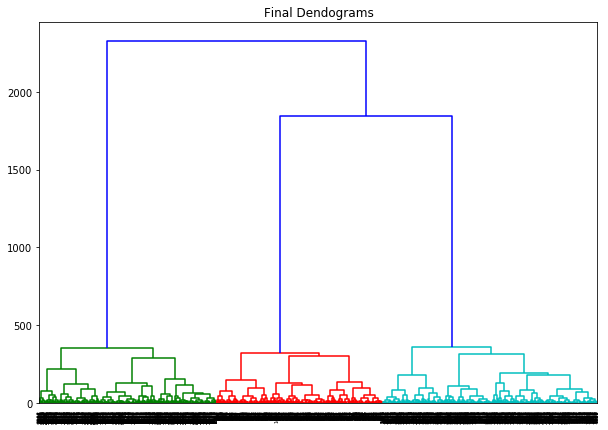

In [14]:
# plotting dendograms for better interpreting the clustering results, the optimal number of clusters seems to be 3
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Final Dendograms")  
dend = shc.dendrogram(shc.linkage(measured_data, method='ward'))  

In [10]:
# applying agglomerative clustering algorithm
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y = cluster.fit_predict(measured_data)  

Text(0,0.5,'V2')

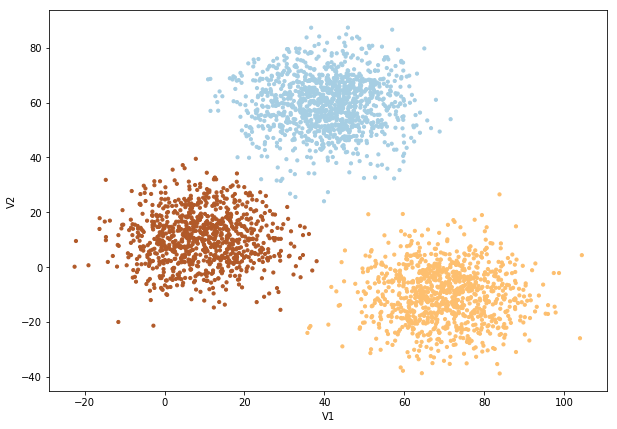

In [22]:
# plotting the results
plt.figure(figsize=(10, 7))  
plt.scatter(measured_data[:,0], measured_data[:,1], c=y, s=10, cmap='Paired') 
plt.xlabel('V1')
plt.ylabel('V2')

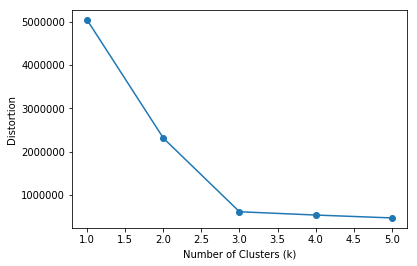

In [16]:
# checking the optimal number of clusters by using the elbow method
# the “elbow” seems to be located at k = 3 (the distortion will not be decreased significantly if we tell the algorithm to use a larger number of clusters, hence the clustering result might be too complicated and not “natural”)

from sklearn.cluster import KMeans
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(measured_data)
    distortions.append(model.inertia_)

plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

Text(0,0.5,'V2')

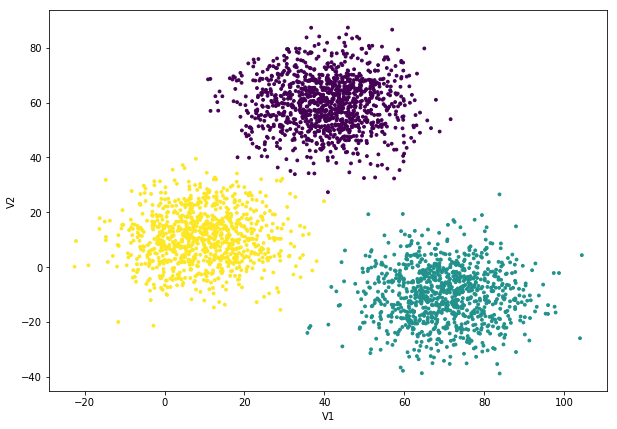

In [24]:
#implementing K-Means clustering and plotting the results
labels = KMeans(3, random_state=1).fit_predict(measured_data)
plt.figure(figsize=(10, 7))  
plt.scatter(measured_data[:, 0], measured_data[:, 1], c=labels,
            s=8, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')

In [ ]:
# on the basis of above implemented calculations, it is evident that the test data can be split into 3 quite well-separated clusters